In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

shape X_train:  (100, 2)
shape Y_train:  (100, 1)


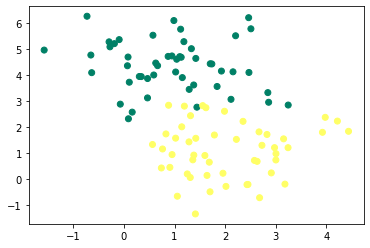

In [33]:
X_train, Y_train = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
Y_train = Y_train.reshape((Y_train.shape[0], 1))

X_test, Y_test = make_blobs(n_samples=100, n_features=2, centers=2)
Y_train = Y_train.reshape((Y_train.shape[0], 1))

print("shape X_train: ", X_train.shape)
print("shape Y_train: ", Y_train.shape)

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap="summer")
plt.show()

In [34]:
def initialisation(X_train):
	W = np.random.randn(X_train.shape[1], 1)
	b = np.random.randn(1)
	return (W, b)

In [35]:
def model(X_train, W, b):
	Z = X_train.dot(W) + b
	A = 1 / (1 + np.exp(-Z))
	return (A)

In [36]:
def log_loss(A, Y_train):
	epsilon = 1e-15
	return (1 / len(Y_train) * np.sum(-Y_train * np.log(A + epsilon) - (1 - Y_train) * np.log(1 - A + epsilon)))

In [37]:
def gradients(A, X_train, Y_train):
	dW = 1 / len(Y_train) * np.dot(X_train.T, A - Y_train)
	db = 1 / len(Y_train) * np.sum(A - Y_train)
	return (dW, db)

In [38]:
def update(dW, db, W, b, learning_rate):
	W = W - learning_rate * dW
	b = b - learning_rate * db
	return (W, b)

In [39]:
def predict(X_train, W, b):
	A = model(X_train, W, b)
	return (A >= 0.5)

In [40]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [41]:
def simple_neuron(X_train, Y_train, learning_rate=0.5, loops=10000):
	W, b = initialisation(X_train)

	for i in tqdm(range(loops)):
		A = model(X_train, W, b)
		loss = log_loss(A, Y_train)
		dW, db = gradients(A, X_train, Y_train)
		W, b = update(dW, db, W, b, learning_rate)

	Y_pred = predict(X_train, W, b)
	print("accuracy score =", accuracy_score(Y_train, Y_pred))
	return (W, b)

100%|██████████| 10000/10000 [00:01<00:00, 7749.17it/s]

accuracy score = 0.94
final accuracy score = 0.94


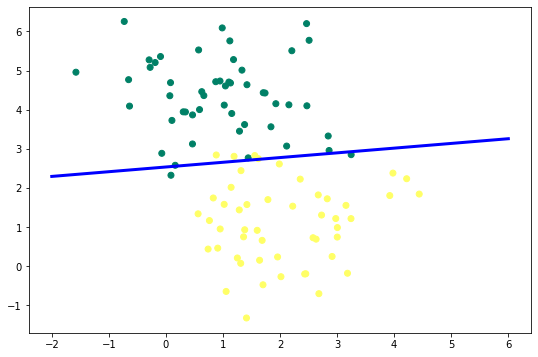

In [42]:
W, b = simple_neuron(X_train, Y_train)
Y_final_prediction = predict(X_train, W, b)
print ("final accuracy score =", accuracy_score(Y_train, Y_final_prediction))

fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap="summer")

xline = np.linspace(-2, 6, 400)
yline = (-W[0] * xline - b) / W[1]
ax.plot(xline, yline, c='blue', lw=3)